In [1]:
import os    
%pylab inline
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"
import theano

from keras.layers import Input, Dense
from keras.layers import Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
from keras.models import Sequential, Model
from keras.optimizers import *
from keras.utils.np_utils import *
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.datasets import cifar10

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split

Populating the interactive namespace from numpy and matplotlib
Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
Using Theano backend.


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(50000, 3, 32, 32)
(50000, 1)
(10000, 3, 32, 32)
(10000, 1)


10000
[3 8 8 ..., 5 1 7]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000    0]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


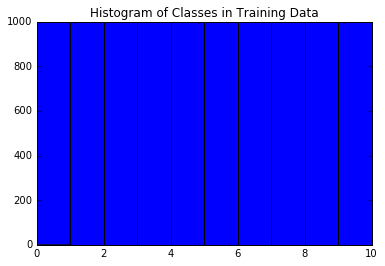

In [4]:
test_classes=np.ravel(y_test)
print (len(test_classes))
print (test_classes)
hist, bin_edges = np.histogram(test_classes,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
print (hist)
print (bin_edges)

# find the distribution of Classes in Train and Test
plt.hist(test_classes, bins=[0,1,2,3,4,5,6,7,8,9,10])  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of Classes in Training Data")
plt.show()

50000
[6 9 9 ..., 9 1 1]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
[ 0  1  2  3  4  5  6  7  8  9 10]


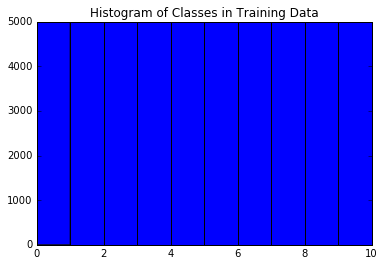

In [5]:
train_classes=np.ravel(y_train)
print (len(train_classes))
print (train_classes)

hist, bin_edges = np.histogram(train_classes,bins=[0,1,2,3,4,5,6,7,8,9,10])

print (hist)
print (bin_edges)

# find the distribution of Classes in Train and Test
plt.hist(train_classes, bins=[0,1,2,3,4,5,6,7,8,9,10])  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of Classes in Training Data")
plt.show()

In [6]:
#x_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
#x_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

x_train=X_train
x_test = X_test
print (x_train.shape)
print (x_test.shape)

(50000, 3, 32, 32)
(10000, 3, 32, 32)


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [7]:
x_train = x_train.astype('float32') / 1.
x_test = x_test.astype('float32') / 1.

In [8]:
# Normalize the data: subtract the mean image
mean_image = np.mean(x_train, axis=0)
x_train -= mean_image
x_test -= mean_image

In [7]:
x_train /= np.std(x_train, axis = 0) # normalize
x_test /= np.std(x_test, axis = 0) # normalize

In [9]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
s_train, s_valid = train_test_split(x_train, test_size=0.1)
label_train, label_valid = train_test_split(y_train, test_size=0.1)


5000
[7 3 2 ..., 3 7 3]
[474 538 497 477 511 488 505 491 509 510]
[ 0  1  2  3  4  5  6  7  8  9 10]


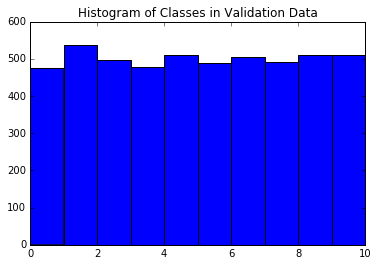

In [11]:
valid_classes=np.ravel(label_valid)
print (len(valid_classes))
print (valid_classes)

hist, bin_edges = np.histogram(valid_classes,bins=[0,1,2,3,4,5,6,7,8,9,10])

print (hist)
print (bin_edges)

# find the distribution of Classes in Train and Test
plt.hist(valid_classes, bins=[0,1,2,3,4,5,6,7,8,9,10])  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of Classes in Validation Data")
plt.show()

In [12]:
print (s_train.shape)
print (s_valid.shape)

print (label_train.shape)
print (label_valid.shape)
print (x_test.shape)
print (y_test.shape)
print(y_test)
label_train=to_categorical(label_train)
label_valid=to_categorical(label_valid)
label_test= to_categorical(y_test)
print (label_train.shape)
print (label_valid.shape)
print (label_test.shape)
print (label_test)
print (label_valid)


(45000, 3072)
(5000, 3072)
(45000, 1)
(5000, 1)
(10000, 3072)
(10000, 1)
[[3]
 [8]
 [8]
 ..., 
 [5]
 [1]
 [7]]
(45000, 10)
(5000, 10)
(10000, 10)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]]
[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [13]:
# To stop potential randomness
seed = 56
rng = np.random.RandomState(seed)

In [23]:
# define vars
input_num_units = 3072
#hidden_num_units = 50
hidden_num_units = 500
output_num_units = 10

epochs = 50
batch_size = 512

In [24]:
# Shallow Network
model = Sequential([
  Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

In [ ]:
# Deep network

hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500


In [83]:
# Deep network
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [97]:
dropout_ratio = 0.2

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [25]:
# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
lrate = 0.002
#decay = lrate/epochs
decay = 0.95
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [27]:
trained_model = model.fit(
    s_train, label_train, nb_epoch=epochs, batch_size=batch_size, 
    validation_data=(s_valid, label_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 2s - loss: 14.3842 - acc: 0.1006 - val_loss: 14.4447 - val_acc: 0.0978
Epoch 2/50
45000/45000 [==============================] - 2s - loss: 14.2924 - acc: 0.1073 - val_loss: 14.4552 - val_acc: 0.0978
Epoch 3/50
45000/45000 [==============================] - 2s - loss: 14.2539 - acc: 0.1102 - val_loss: 14.4512 - val_acc: 0.0972
Epoch 4/50
45000/45000 [==============================] - 2s - loss: 14.2374 - acc: 0.1118 - val_loss: 14.4583 - val_acc: 0.0972
Epoch 5/50
45000/45000 [==============================] - 2s - loss: 14.2264 - acc: 0.1126 - val_loss: 14.4521 - val_acc: 0.0970
Epoch 6/50
45000/45000 [==============================] - 2s - loss: 14.2187 - acc: 0.1134 - val_loss: 14.4551 - val_acc: 0.0968
Epoch 7/50
45000/45000 [==============================] - 2s - loss: 14.2137 - acc: 0.1135 - val_loss: 14.4521 - val_acc: 0.0968
Epoch 8/50
45000/45000 [========================

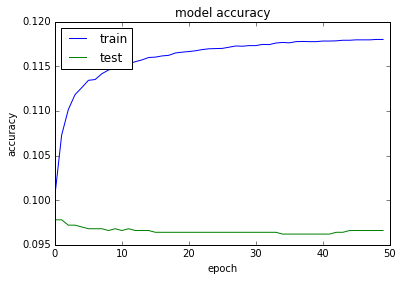

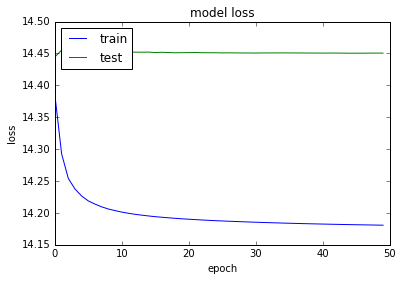

In [28]:
# summarize history for accuracy
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# reshape data
#train_x_temp = s_train.reshape(-1,3,32,32)
#val_x_temp = s_valid.reshape(-1,3,32,32)
#test_x_temp=x_test.reshape(-1,3,32,32)

train_x_temp = s_train
val_x_temp = s_valid
test_x_temp=x_test

print(train_x_temp.shape)
print(val_x_temp.shape)
print(test_x_temp.shape)

dropout_ratio = 0.5


# define vars
input_shape = (3072,)
input_reshape = (3, 32, 32)

conv_num_filters = 5
conv_filter_size = 5

pool_size = (2, 2)

hidden_num_units = 512
output_num_units = 10

epochs = 25
batch_size = 256

callbacks = [
                EarlyStopping(monitor='val_loss', patience=4, verbose=1)
        ]

model = Sequential([
 #InputLayer(input_shape=input_reshape),

 Convolution2D(32, 3, 3, border_mode='same',activation='relu',W_constraint=maxnorm(3),input_shape=input_reshape),
 #MaxPooling2D(pool_size=pool_size),
 Dropout(dropout_ratio),
 Convolution2D(32, 3, 3, border_mode='same',activation='relu',W_constraint=maxnorm(3)),
 MaxPooling2D(pool_size=pool_size),
 Flatten(),
 Dense(output_dim=hidden_num_units, activation='relu',W_constraint=maxnorm(3)),
 Dropout(0.5),
        
 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Compile model
lrate = 0.005
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

trained_model_conv = model.fit(train_x_temp, label_train, 
                               nb_epoch=epochs, batch_size=batch_size, 
                               validation_data=(test_x_temp, label_test),
                               callbacks=callbacks
                              )

(49950, 3, 32, 32)
(50, 3, 32, 32)
(10000, 3, 32, 32)
Train on 49950 samples, validate on 10000 samples
Epoch 1/25
49950/49950 [==============================] - 82s - loss: 2.3162 - acc: 0.0990 - val_loss: 2.3043 - val_acc: 0.0894
Epoch 2/25
49950/49950 [==============================] - 82s - loss: 2.3036 - acc: 0.1018 - val_loss: 2.3038 - val_acc: 0.0893
Epoch 3/25
49950/49950 [==============================] - 83s - loss: 2.3029 - acc: 0.1033 - val_loss: 2.3034 - val_acc: 0.0955
Epoch 4/25
49950/49950 [==============================] - 82s - loss: 2.3026 - acc: 0.1026 - val_loss: 2.3035 - val_acc: 0.0919
Epoch 5/25
49950/49950 [==============================] - 83s - loss: 2.3026 - acc: 0.1038 - val_loss: 2.3041 - val_acc: 0.0968
Epoch 6/25
49950/49950 [==============================] - 83s - loss: 2.3023 - acc: 0.1026 - val_loss: 2.3047 - val_acc: 0.0924
Epoch 7/25
49950/49950 [==============================] - 83s - loss: 2.3020 - acc: 0.1072 - val_loss: 2.3058 - val_acc: 0.0789


In [12]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32, 32, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 32, 32)    9248        dropout_1[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 16, 16)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

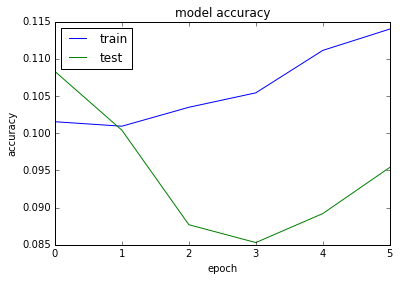

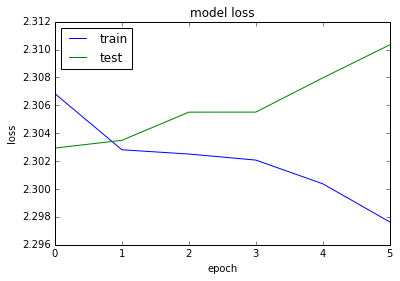

In [17]:
# summarize history for accuracy
plt.plot(trained_model_conv.history['acc'])
plt.plot(trained_model_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model_conv.history['loss'])
plt.plot(trained_model_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
#pred = model.predict_classes(x_test)
pred = model.predict_classes(x_test)

 9984/10000 [============================>.] - ETA: 0s

In [11]:
#pred = model.predict_classes(x_test)
pred = model.predict_classes(test_x_temp)

10000/10000 [==============================] - 6s     


In [12]:
pred

array([7, 6, 1, ..., 4, 2, 1])

In [13]:
pred= to_categorical(pred)

In [14]:
pred

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [15]:
label_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [16]:
num=len(label_test)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(pred[i],label_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")

tested  10000 digits
correct:  928 wrong:  9072 error rate:  90.72 %
got correctly  9.28 %
